In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Titanic - Statistics

## Link dataset: https://www.kaggle.com/c/titanic/data

### Contexto

El RMS Titanic fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que se hundió durante la noche del 14 y la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. 

En el hundimiento del Titanic murieron 1496 personas de las 2208 que iban a bordo, lo que convierte a esta catástrofe en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

Entre sus pasajeros estaban algunas de las personas más ricas del mundo, además de cientos de inmigrantes de nacionalidad irlandesa, británica y escandinava que iban en busca de una mejor vida en Norteamérica

El barco estaba equipado con avanzadas medidas de seguridad, como los mamparos de su casco y compuertas estancas activadas a distancia. Sin embargo, y debido a las obsoletas normas de seguridad de la época, solo portaba botes salvavidas para 1178 pasajeros, poco más de la mitad de los que iban a bordo en su viaje inaugural y un tercio de su capacidad total de 3547 personas.

### Descripción de datos

#### Descripción general
Los datos se han dividido en dos grupos:
- conjunto de entrenamiento (train.csv) <br>
- conjunto de prueba (test.csv)

#### Diccionario de datos
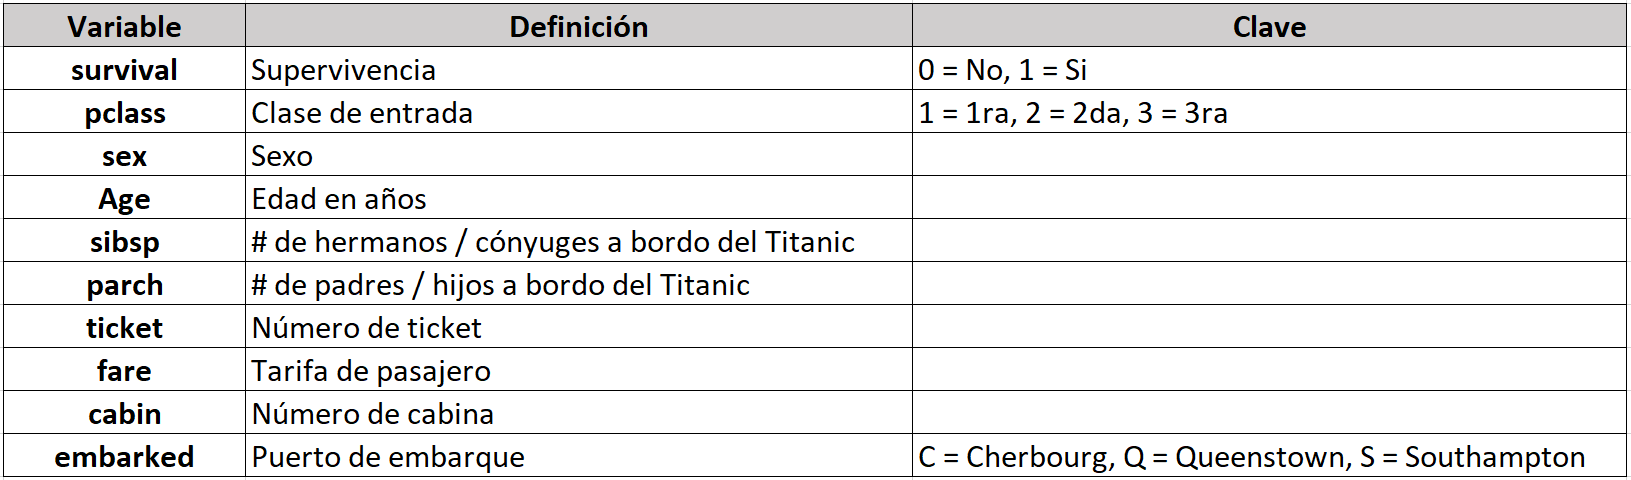

#### Notas variables
##### pclass : un proxy para el estatus socioeconómico (SES)
1ra clase = Alta <br>
2da clase = Media <br>
3ra clase = Baja

#### edad : la edad es fraccionaria si es menor que 1. Si se estima la edad, ¿está en la forma de xx.5

#### sibsp : el conjunto de datos define las relaciones familiares de esta manera ...
Hermano = hermano, hermana, hermanastro, hermanastra <br>
Cónyuge = esposo, esposa (se ignoraron las amantes y los novios)

#### parch : El conjunto de datos define las relaciones familiares de esta manera ...
Padre = madre, padre <br>
Niño = hija, hijo, hijastra, hijastro <br>
Algunos niños viajaban solo con una niñera, por lo tanto, parch = 0 para ellos.

### Reto: ¿Cuál es la tasa de supervivencia por género, clase y embarque?
### Acampañar la respuesta con un gráfico.

In [ ]:
#Importamos todas las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explorando el dataset

In [ ]:
#Leemos el dataset desde drive
#titanic = pd.read_csv('drive/MyDrive/Colab Notebooks/Challenges - DataCamp/Challenge 3 - Kaggle/train.csv')
#titanic.info()
#print('\n')
#titanic

In [ ]:
#Leemos el dataset desde internet
titanic = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/dsfem_datachallenge_monthly/main/titanic_machine_learning_from_disaster/data/train.csv')
titanic.info()
print('\n')
titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Ticket tiene una mezcla de datos numéricos y alfanumericos.
- Cabin es alfanumerico

### Campos del dataset
¿Cuántos registros tiene el dataset? El dataset tiene 891 entradas o registros

¿Qué columnas tienen registros vacíos? Age,Cabin y Embarked tienen registros vacíos

¿Qué tipos de datos que tiene nuestro dataset? 2 columnas/campos tienen decimales (float), 5 son enteros (int) y 5 son cadenas (object/string)

In [ ]:
#Columnas con valores nulos
titanic.isnull().sum()
#titanic.isna().sum() #Otra forma de hacer los mismo

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
help(pd.isna)
#? pd.isnull

Help on function isna in module pandas.core.dtypes.missing:

isna(obj)
    Detect missing values for an array-like object.
    
    This function takes a scalar or array-like object and indicates
    whether values are missing (``NaN`` in numeric arrays, ``None`` or ``NaN``
    in object arrays, ``NaT`` in datetimelike).
    
    Parameters
    ----------
    obj : scalar or array-like
        Object to check for null or missing values.
    
    Returns
    -------
    bool or array-like of bool
        For scalar input, returns a scalar boolean.
        For array input, returns an array of boolean indicating whether each
        corresponding element is missing.
    
    See Also
    --------
    notna : Boolean inverse of pandas.isna.
    Series.isna : Detect missing values in a Series.
    DataFrame.isna : Detect missing values in a DataFrame.
    Index.isna : Detect missing values in an Index.
    
    Examples
    --------
    Scalar arguments (including strings) result in a scala

### ¿Qué tipos de datos son nuestras columnas?

#### Categóricos (Son aquellas que provienen de procesos que involucran clasificaciones)
##### Nominales: (Son aquellas que sus valores representan categorías que no obedecen a una clasificación intrínseca)
- PassengerId
- Survived
- Name
- Sex
- Ticket
- Cabin
- Embarked

##### Ordinales: (Son aquellas que sus valores representan categorías con alguna clasificación intrínseca.)
- Pclass


#### Numéricos
##### Continuos: (Son aquellas que provienen de mediciones)
- Age
- Fare

##### Discretos: (Son aquellas que provienen de procesos que involucran conteos)
- SibSp
- Parch

### Medidas de tendencia central
- Moda
- Media
- Mediana

### Medidas de disperción
- Desviación estándar
- Varianza
- Rango intercuantil

In [ ]:
# Estadísticas descriptivas de las variables numericas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Estadísticas descriptivas de las variables categoricas
titanic.describe(include=['O'])
#titanic_df.describe(include=[object]) #Otra forma de hacer lo mismo

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mannion, Miss. Margareth",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Recuento de los valores unicos de las varibles categoricas que nos interesan

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Survived' sin nulos
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Sex' sin nulos
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Pclass' sin nulos
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Embarked' sin nulos
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Distribuciones teniendo en cuenta sobrevivientes y no sobrevientes

### Distribución por sobrevivientes y no sobrevivientes

In [ ]:
#Obtenemos el total de pasajeros y lo guardamos en una variable
total_sur = len(titanic)
total_sur

891

Total de pasajeros (sobrevivientes y no sobrevivientes): 891

In [ ]:
# Creamos un df para hacer el recuento de sobrevivientes y no sobrevivientes
df_sur = titanic.groupby('Survived')[['Survived']].count()
df_sur = df_sur.rename(columns={'Survived':'Count'})

#Creamos una columna para el porcentaje de sobrevivientes y no sobrevivientes
df_sur['Percentage'] = round((df_sur['Count'] / total_sur) * 100, 2)
df_sur = df_sur.reset_index()
df_sur['Survived'] = ['No', 'Si']
df_sur

,Survived,Count,Percentage
0,No,549,61.62
1,Si,342,38.38


Text(0.5, 1.0, 'Porcentaje de Sobrevivientes y No Sobrevivientes')

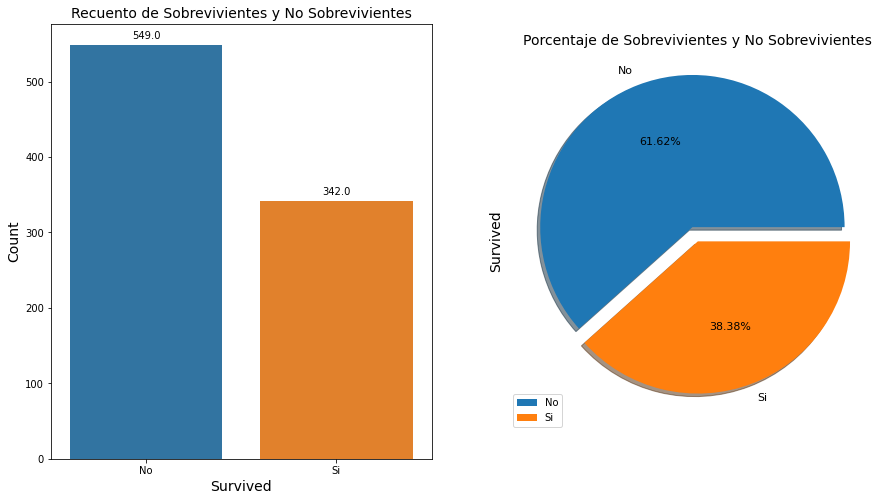

In [ ]:
# Grafica de barras y pie de sobrevivientes y no sobrevivientes
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Survived", y="Count", data=df_sur,
                ax=ax[0])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

titanic['Survived'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                        ax=ax[1], legend=True, fontsize=11,
                                        explode=[0.1,0], labels=['No', 'Si'])

ax[0].set_xlabel('Survived', size=14)
ax[1].set_ylabel('Survived', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento de Sobrevivientes y No Sobrevivientes", size=14)
ax[1].set_title("Porcentaje de Sobrevivientes y No Sobrevivientes", size=14)

### Distribución por genero (teniendo en cuenta sobrevivientes y no sobrevientes)

In [ ]:
# Creamos un df para hacer el recuento por genero
df_sex = titanic.groupby('Sex')[['Sex']].count()
df_sex = df_sex.rename(columns={'Sex':'Count'})

#Creamos una columna para el porcentaje de hombres y mujeres
df_sex['Percentage'] = round((df_sex['Count'] / total_sur) * 100, 2)
df_sex = df_sex.reset_index()
df_sex

,Sex,Count,Percentage
0,female,314,35.24
1,male,577,64.76


Text(0.5, 1.0, 'Porcentaje por Genero')

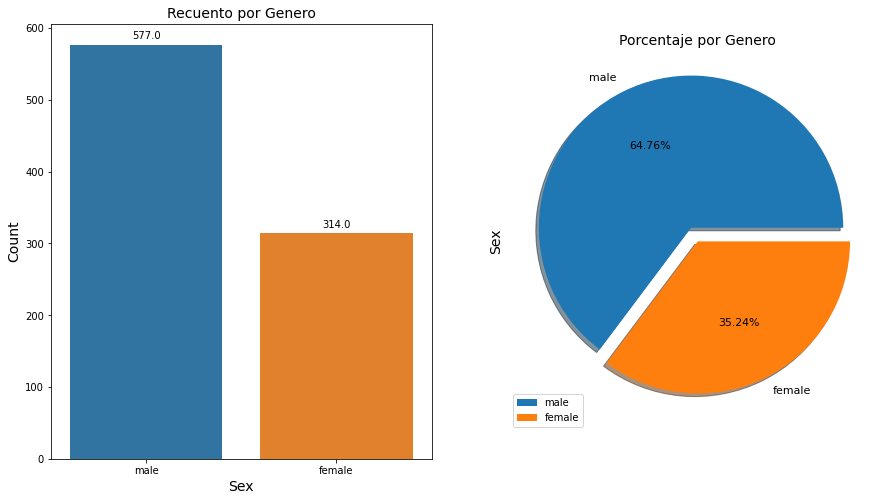

In [ ]:
# Grafica de barras y pie por genero
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Sex", y="Count", data=df_sex,
                ax=ax[0], order=['male', 'female'])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

titanic['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                   ax=ax[1], legend=True, fontsize=11,
                                   explode=[0.1,0])

ax[0].set_xlabel('Sex', size=14)
ax[1].set_ylabel('Sex', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento por Genero", size=14)
ax[1].set_title("Porcentaje por Genero", size=14)

### Distribución por clase (teniendo en cuenta sobrevivientes y no sobrevientes)

In [ ]:
# Creamos un df para hacer el recuento por clase
df_clas = titanic.groupby('Pclass')[['Pclass']].count()
df_clas = df_clas.rename(columns={'Pclass':'Count'})

#Creamos una columna para el porcentaje por clase
df_clas['Percentage'] = round((df_clas['Count'] / total_sur) * 100, 2)
df_clas = df_clas.reset_index()
df_clas

,Pclass,Count,Percentage
0,1,216,24.24
1,2,184,20.65
2,3,491,55.11


Text(0.5, 1.0, 'Porcentaje por Clase')

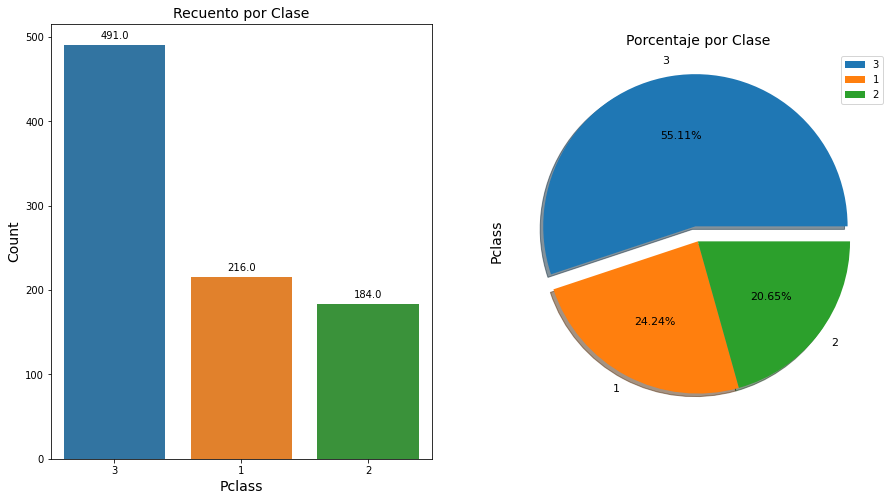

In [ ]:
# Grafica de barras y pie por clase
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Pclass", y="Count", data=df_clas,
                ax=ax[0], order=[3, 1, 2])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

titanic['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                      ax=ax[1], legend=True, fontsize=11,
                                      labels=[3, 1, 2], explode=[0.1,0,0])

ax[0].set_xlabel('Pclass', size=14)
ax[1].set_ylabel('Pclass', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento por Clase", size=14)
ax[1].set_title("Porcentaje por Clase", size=14)

### Distribución por puerto de embarque (teniendo en cuenta sobrevivientes y no sobrevientes)

In [ ]:
# Creamos un df para hacer el recuento por puerto de embarque
df_emb = titanic.groupby('Embarked')[['Embarked']].count()
df_emb = df_emb.rename(columns={'Embarked':'Count'})

#Creamos una columna para el porcentaje por puerto de embarque
df_emb['Percentage'] = round((df_emb['Count'] / total_sur) * 100, 2)
df_emb = df_emb.reset_index()
df_emb['Embarked'] = ['C: Cherbourg', 'Q: Queenstown', 'S: Southampton']
df_emb

,Embarked,Count,Percentage
0,C: Cherbourg,168,18.86
1,Q: Queenstown,77,8.64
2,S: Southampton,644,72.28


Text(0.5, 1.0, 'Porcentaje por Puerto de Embarque')

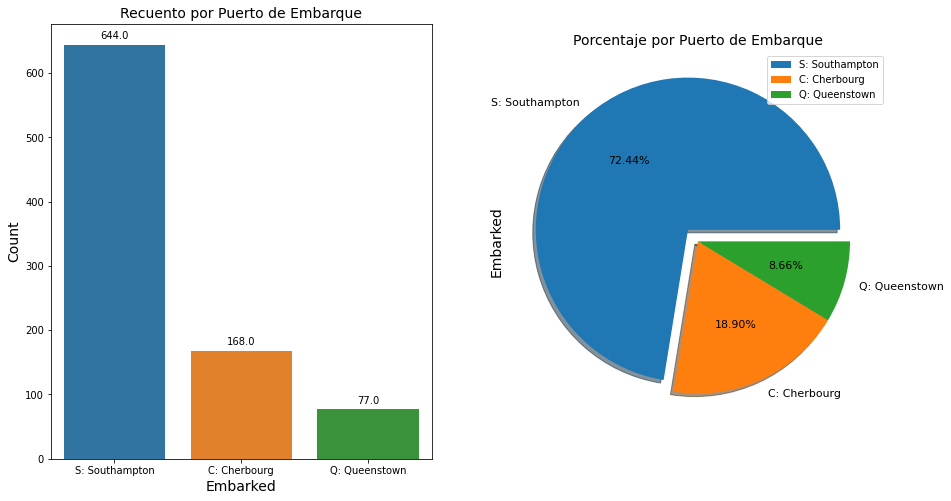

In [ ]:
# Grafica de barras y pie por puerto de embarque
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Embarked", y="Count", data=df_emb,
                ax=ax[0], order=['S: Southampton', 'C: Cherbourg', 'Q: Queenstown'])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

titanic['Embarked'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                        ax=ax[1], legend=True, fontsize=11,
                                        labels=['S: Southampton', 'C: Cherbourg', 'Q: Queenstown'], explode=[0.1,0,0])

ax[0].set_xlabel('Embarked', size=14)
ax[1].set_ylabel('Embarked', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento por Puerto de Embarque", size=14)
ax[1].set_title("Porcentaje por Puerto de Embarque", size=14)

## Distribuciones teniendo en cuenta solo los sobrevivientes

In [ ]:
df_only_sur = titanic[titanic['Survived'] == 1]
df_only_sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
#Obtenemos el total de pasajeros sobrevientes y lo guardamos en una variable
total_only_sur = len(df_only_sur)
total_only_sur

342

Total de sobrevivientes: 342

### Tasa de supervivencia por genero

In [ ]:
# Creamos un df para hacer el recuento de sobrevivientes por genero
df_sur_sex = df_only_sur.groupby(['Sex', 'Survived'])[['Survived']].count()
df_sur_sex = df_sur_sex.rename(columns={'Survived':'Count'})

#Creamos una columna para el porcentaje de sobrevivientes por genero
df_sur_sex['Percentage'] = round((df_sur_sex['Count'] / total_only_sur) * 100, 2)
df_sur_sex = df_sur_sex.reset_index()
df_sur_sex['Survived'] = ['Si', 'Si']
df_sur_sex

,Sex,Survived,Count,Percentage
0,female,Si,233,68.13
1,male,Si,109,31.87


Text(0.5, 1.0, 'Porcentaje de Sobrevivientes por Genero')

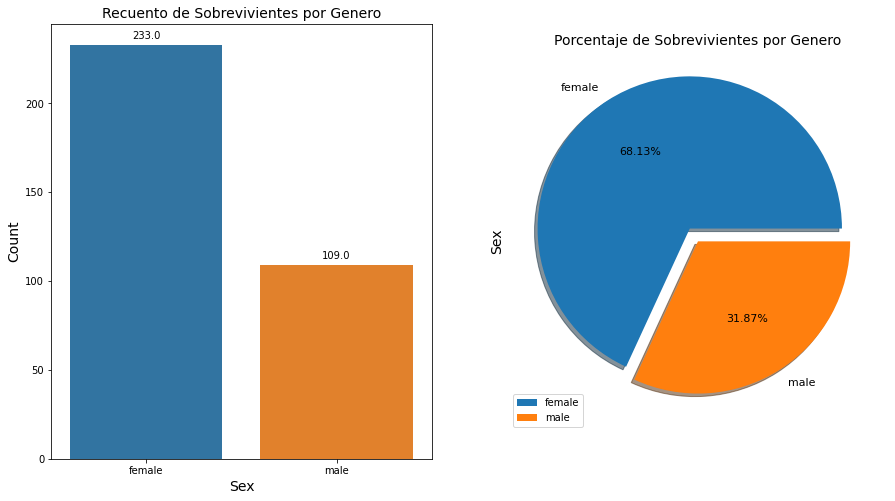

In [ ]:
# Grafica de barras y pie de sobrevivientes por genero
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Sex", y="Count", data=df_sur_sex,
                ax=ax[0])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

df_only_sur['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                       ax=ax[1], legend=True, fontsize=11,
                                       explode=[0.1,0])

ax[0].set_xlabel('Sex', size=14)
ax[1].set_ylabel('Sex', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento de Sobrevivientes por Genero", size=14)
ax[1].set_title("Porcentaje de Sobrevivientes por Genero", size=14)

### Tasa de supervivencia por clase

In [ ]:
# Creamos un df para hacer el recuento de sobrevivientes por clase
df_sur_clas = df_only_sur.groupby(['Pclass', 'Survived'])[['Pclass']].count()
df_sur_clas = df_sur_clas.rename(columns={'Pclass':'Count'})

#Creamos una columna para el porcentaje de sobrevivientes por clase
df_sur_clas['Percentage'] = round((df_sur_clas['Count'] / total_only_sur) * 100, 2)
df_sur_clas = df_sur_clas.reset_index()
df_sur_clas['Survived'] = ['Si', 'Si', 'Si']
df_sur_clas

,Pclass,Survived,Count,Percentage
0,1,Si,136,39.77
1,2,Si,87,25.44
2,3,Si,119,34.80


Text(0.5, 1.0, 'Porcentaje de Sobrevivientes por Clase')

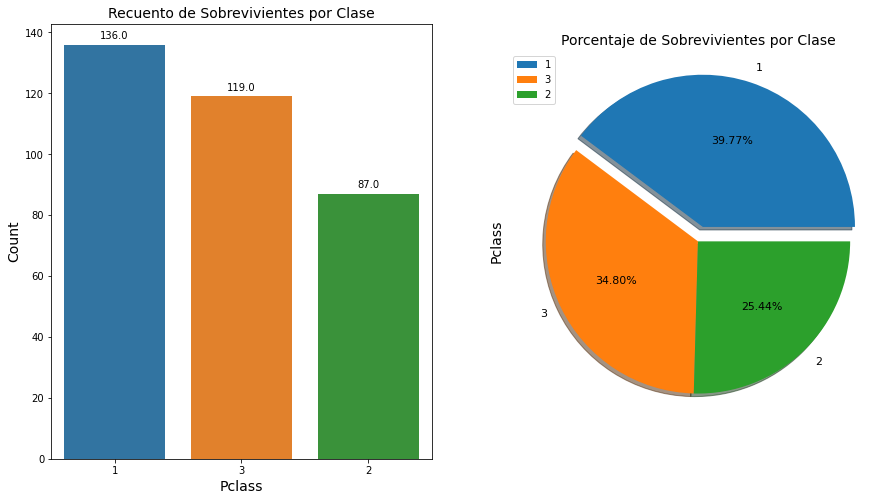

In [ ]:
# Grafica de barras y pie de sobrevivientes por clase
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Pclass", y="Count", data=df_sur_clas,
                ax=ax[0], order=[1,3,2])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

df_only_sur['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                       ax=ax[1], legend=True, fontsize=11,
                                       explode=[0.1,0,0], labels=[1,3,2])

ax[0].set_xlabel('Pclass', size=14)
ax[1].set_ylabel('Pclass', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento de Sobrevivientes por Clase", size=14)
ax[1].set_title("Porcentaje de Sobrevivientes por Clase", size=14)

### Tasa de supervivencia por puerto de embarque

In [ ]:
# Creamos un df para hacer el recuento de sobrevivientes por puerto de embarque
df_sur_emb = df_only_sur.groupby(['Embarked', 'Survived'])[['Embarked']].count()
df_sur_emb = df_sur_emb.rename(columns={'Embarked':'Count'})

#Creamos una columna para el porcentaje de sobrevivientes por puerto de embarque
df_sur_emb['Percentage'] = round((df_sur_emb['Count'] / total_only_sur) * 100, 2)
df_sur_emb = df_sur_emb.reset_index()
df_sur_emb['Survived'] = ['Si', 'Si', 'Si']
df_sur_emb['Embarked'] = ['C: Cherbourg', 'Q: Queenstown', 'S: Southampton']
df_sur_emb

,Embarked,Survived,Count,Percentage
0,C: Cherbourg,Si,93,27.19
1,Q: Queenstown,Si,30,8.77
2,S: Southampton,Si,217,63.45


Text(0.5, 1.0, 'Porcentaje de Sobrevivientes por Puerto de Embarque')

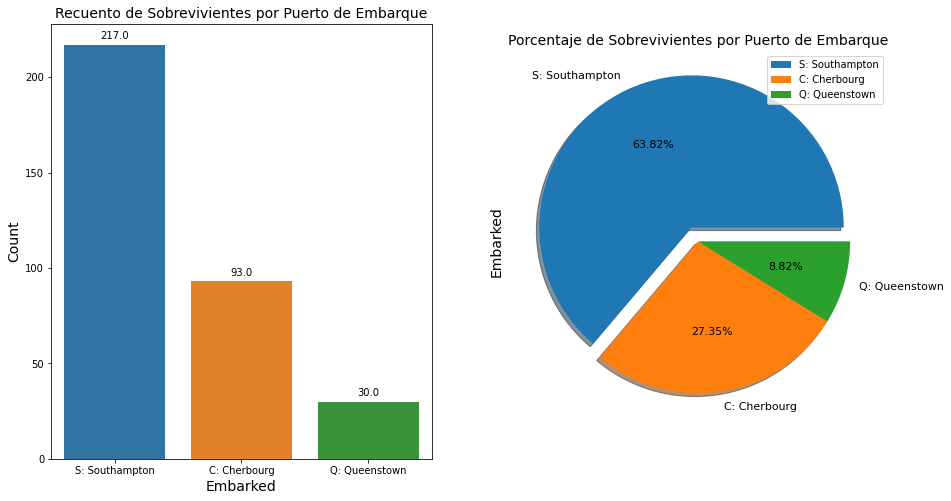

In [ ]:
# Grafica de barras y pie de sobrevivientes por puerto de embarque
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Embarked", y="Count", data=df_sur_emb,
                ax=ax[0], order=['S: Southampton', 'C: Cherbourg', 'Q: Queenstown'])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

df_only_sur['Embarked'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                       ax=ax[1], legend=True, fontsize=11,
                                       explode=[0.1,0,0], labels=['S: Southampton', 'C: Cherbourg', 'Q: Queenstown'])

ax[0].set_xlabel('Embarked', size=14)
ax[1].set_ylabel('Embarked', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento de Sobrevivientes por Puerto de Embarque", size=14)
ax[1].set_title("Porcentaje de Sobrevivientes por Puerto de Embarque", size=14)

### Otras pruebas

### Tasa de sobrevivientes y no sobrevivientes por genero

In [ ]:
# Creamos un df para hacer el recuento de sobrevivientes y no sobrevivientes por genero
df_sur_nosur_sex = titanic.groupby(['Sex', 'Survived'])[['Survived']].count()
df_sur_nosur_sex = df_sur_nosur_sex.rename(columns={'Survived':'Count'})

#Creamos una columna para el porcentaje de sobrevivientes y no sobrevivientes por genero
df_sur_nosur_sex['Percentage'] = round((df_sur_nosur_sex['Count'] / total_sur) * 100, 2)
df_sur_nosur_sex = df_sur_nosur_sex.reset_index()
df_sur_nosur_sex

,Sex,Survived,Count,Percentage
0,female,0,81,9.09
1,female,1,233,26.15
2,male,0,468,52.53
3,male,1,109,12.23


Text(0.5, 1.0, 'Porcentaje de Sobrevivientes y No Sobrevivientes por Genero')

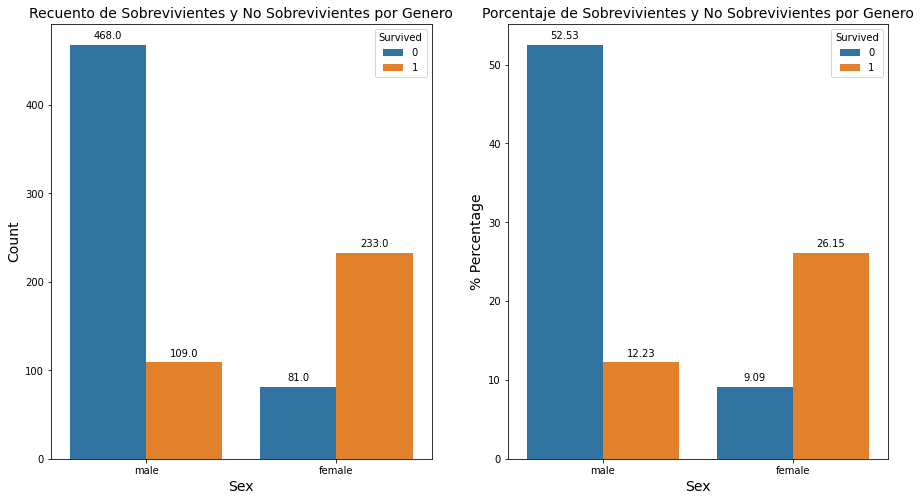

In [ ]:
# Grafica de barras y pie de sobrevivientes y no sobrevivientes por genero
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x='Sex', y="Count", data=df_sur_nosur_sex, hue='Survived',
                ax=ax[0], order=['male', 'female'])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

g1 = sns.barplot(x='Sex', y="Percentage", data=df_sur_nosur_sex, hue='Survived',
                ax=ax[1], order=['male', 'female'])
#Anotaciones en la grafica de barras
for p in g1.patches:
    g1.annotate(format(p.get_height(), '.2f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

ax[0].set_xlabel('Sex', size=14)
ax[1].set_xlabel('Sex', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_ylabel('Count', size=14)
ax[1].set_ylabel('% Percentage', size=14)
ax[0].set_title("Recuento de Sobrevivientes y No Sobrevivientes por Genero", size=14)
ax[1].set_title("Porcentaje de Sobrevivientes y No Sobrevivientes por Genero", size=14)

### Utilizando seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


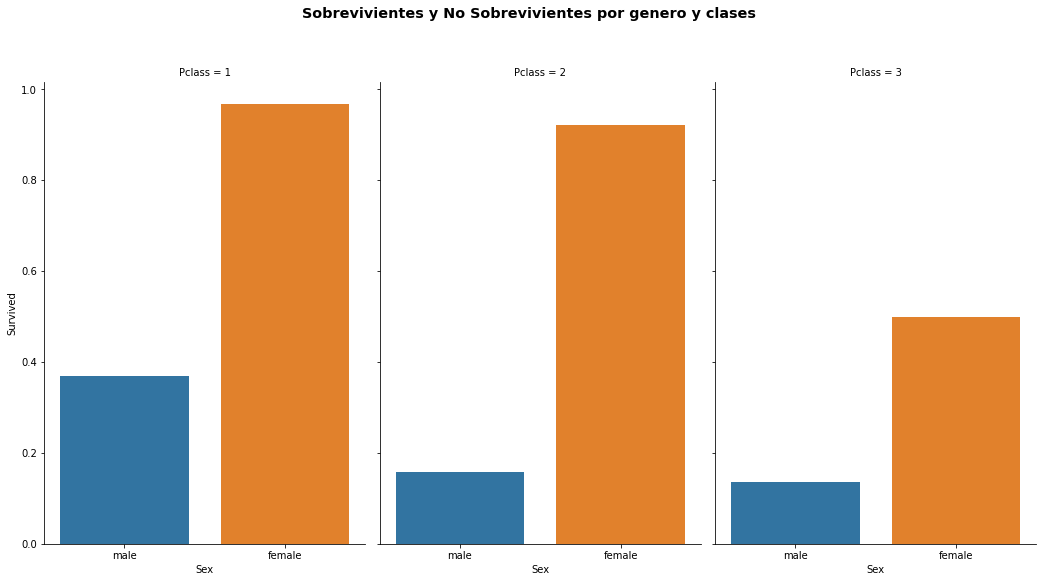

In [ ]:
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                   data=titanic, kind="bar", ci=None,
                   height=8, aspect=.6)
g.fig.suptitle("Sobrevivientes y No Sobrevivientes por genero y clases",
               fontsize='x-large', 
               fontweight='bold')
g.fig.subplots_adjust(top=0.85)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


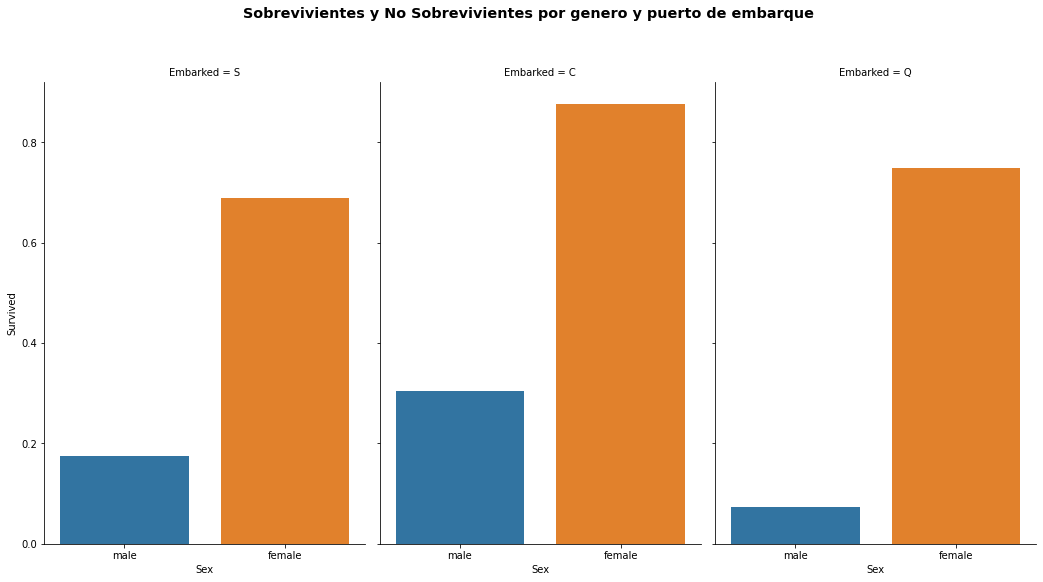

In [ ]:
g = sns.factorplot(x="Sex", y="Survived", col="Embarked",
                   data=titanic, kind="bar", ci=None,
                   height=8, aspect=.6)
g.fig.suptitle("Sobrevivientes y No Sobrevivientes por genero y puerto de embarque",
               fontsize='x-large', 
               fontweight='bold')
g.fig.subplots_adjust(top=0.85)

### Variables Numéricas Continuas

Text(0.5, 1.0, 'Diagrama de caja - Variable Age')

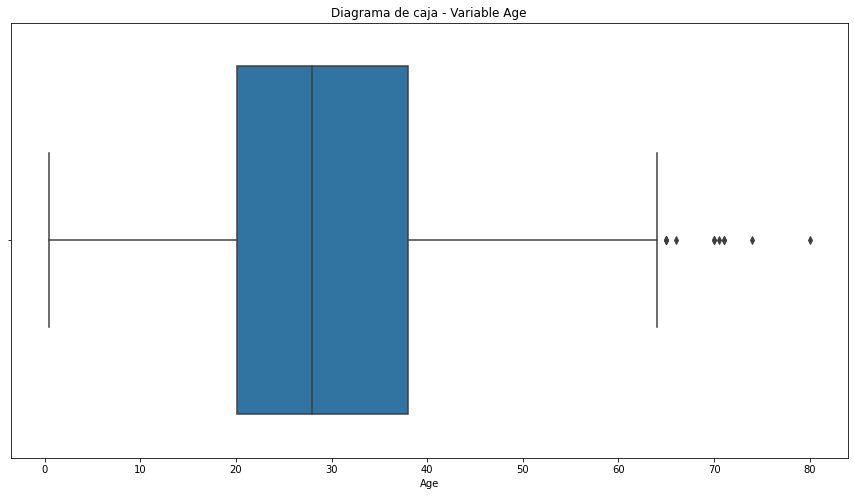

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x="Age", data=titanic)
ax.set_title('Diagrama de caja - Variable Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución - Variable Age')

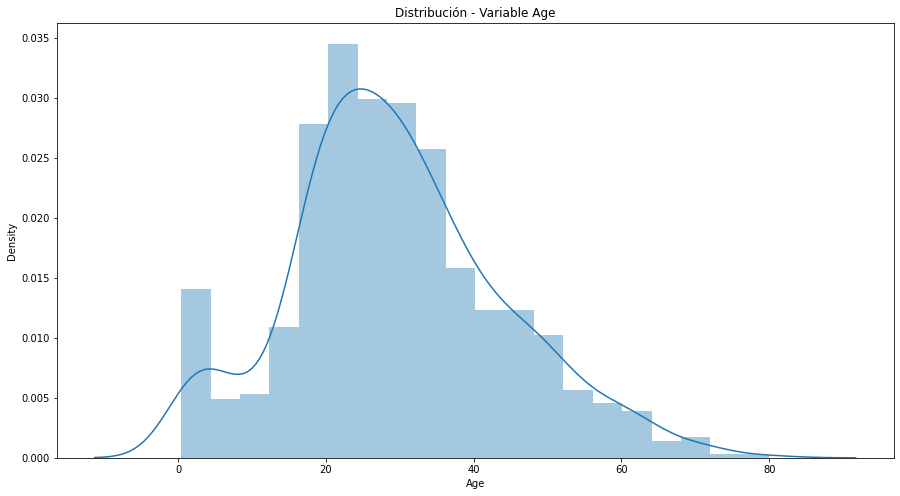

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.distplot(titanic['Age'])
ax.set_title('Distribución - Variable Age')

Text(0.5, 1.0, 'Diagrama de caja - Variable Fare')

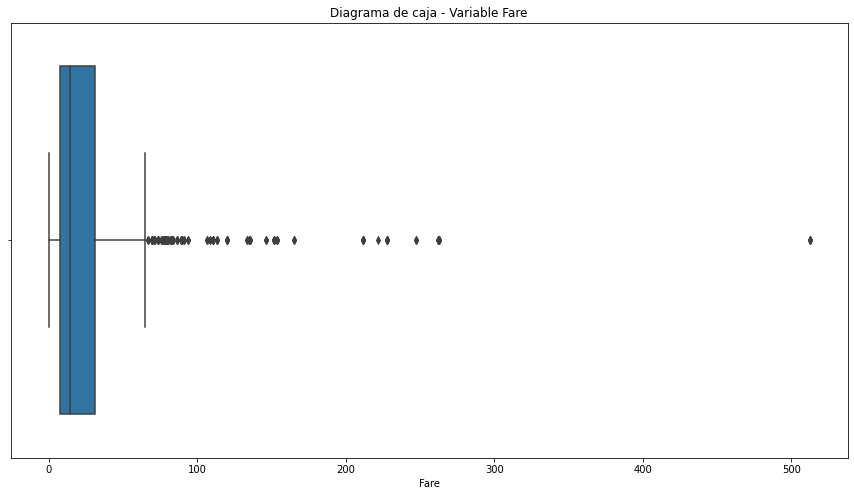

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x="Fare", data=titanic)
ax.set_title('Diagrama de caja - Variable Fare')

## **Otros Datos**

In [ ]:
# filtrando las 5 tarifas mas costosas

titanic.nlargest(5, 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
# Filtrando las 5 tarifas mas bajas 

titanic.nsmallest(5, 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


In [ ]:
# Exploración de tarifa mínima

fare_cero = titanic['Fare'] == 0
fare_cero.value_counts()

False    876
True      15
Name: Fare, dtype: int64

In [ ]:
titanic.query('Fare == "0"')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Es acertado afirmar que estos 15 hombres hacian parte de la tripulación del Titanic. Todos ellos embarcarón en el puerto de Southampton. De los cuales solo uno sobrevivio, el **pasajero 272, Tornquist, Mr. William Henry de 25 años**.

Los 4 hombres que viajarón en tercera clase, entre ellos el único sobreviviente, fueron hombres que no pudieron regresar en sus embarcaciones originales con destino a Nueva York debido a unas huelgas de carbón que se estaban llevando a cabo, como consecuencia que gran parte del carbón habia sido destinado para el viaje inaugural del Titanic. 

**El pasajero 807 Andrews, Mr. Thomas Jr. Fue el constructor de barcos a cargo del Titanic.**

**Ya vimos el extremo inferior de la tarifa minima. Ahora vamos a ver los extremos de las edades(ancianos y niños)**

In [ ]:
# Conoce a las 10 personas de mayor edad 

titanic.nlargest(10, 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [ ]:
# Conoce a las 10 personitas de menor edad 

titanic.nsmallest(10, 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S


### Tasa de sobrevivientes por edad (teniendo en cuenta sobrevivientes y no sobrevientes)

In [ ]:
# Creamos un df para hacer el recuento de sobrevivientes y no sobrevivientes por edad
df_sur_nosur_age = titanic.groupby(['Age', 'Survived'])[['Survived']].count()
df_sur_nosur_age = df_sur_nosur_age.rename(columns={'Survived':'Count'})

#Creamos una columna para el porcentaje de sobrevivientes y no sobrevivientes por edad
df_sur_nosur_age['Percentage'] = round((df_sur_nosur_age['Count'] / total_sur) * 100, 2)
df_sur_nosur_age = df_sur_nosur_age.reset_index()
df_sur_nosur_age

,Age,Survived,Count,Percentage
0,0.42,1,1,0.11
1,0.67,1,1,0.11
2,0.75,1,2,0.22
3,0.83,1,2,0.22
4,0.92,1,1,0.11
...,...,...,...,...
137,70.00,0,2,0.22
138,70.50,0,1,0.11
139,71.00,0,2,0.22
140,74.00,0,1,0.11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


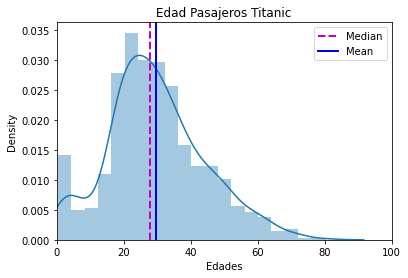

In [ ]:
import pandas as pd 
import statistics as stats

# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(titanic['Age'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="Edades", xlim=(0, 100), title="Edad Pasajeros Titanic")

# Add vertical lines for the median and mean
ax.axvline(x=titanic['Age'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=titanic['Age'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

### Cantidad de Pasajeros con edad menor a 10 años 

In [ ]:
# Cantidad total de niños menores de 10 años abordo
titanic.query('Age <= 10.00').count()

PassengerId    64
Survived       64
Pclass         64
Name           64
Sex            64
Age            64
SibSp          64
Parch          64
Ticket         64
Fare           64
Cabin          10
Embarked       64
dtype: int64

### Sobrevivientes menores de 10 años 

In [ ]:
titanic.query("Age <= 10.00 and Survived == 1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S


In [ ]:
# Total niños sobrevivientes 
titanic.query("Age <= 10.00 and Survived == 1").count()

PassengerId    38
Survived       38
Pclass         38
Name           38
Sex            38
Age            38
SibSp          38
Parch          38
Ticket         38
Fare           38
Cabin           8
Embarked       38
dtype: int64

### Veamos que niños menores de 10 años a que clase pertenecian

In [ ]:
# Niños sobrevivientes de primera clase 

age_kids = titanic.query('Age <=10')
age_kids_pclas1_sur = age_kids.query("Pclass == 1 and Survived == 1")
age_kids_pclas1_sur.count()

PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       2
dtype: int64

In [ ]:
# Niños sobrevivientes de segunda clase 

age_kids = titanic.query('Age <=10')
age_kids_pclas2_sur = age_kids.query("Pclass == 2 and Survived == 1")
age_kids_pclas2_sur.count()

PassengerId    17
Survived       17
Pclass         17
Name           17
Sex            17
Age            17
SibSp          17
Parch          17
Ticket         17
Fare           17
Cabin           4
Embarked       17
dtype: int64

In [ ]:
# Niños sobrevivientes de tercera clase 

age_kids = titanic.query('Age <=10')
age_kids_pclas3_sur = age_kids.query("Pclass == 3 and Survived == 1")
age_kids_pclas3_sur.count()

PassengerId    19
Survived       19
Pclass         19
Name           19
Sex            19
Age            19
SibSp          19
Parch          19
Ticket         19
Fare           19
Cabin           2
Embarked       19
dtype: int64

In [ ]:
#Dataframe los menores de 10 años que sobrevivieron por clase
ch_sur_clas = titanic.query("Age <= 10.00 and Survived == 1")

#Cantidad de menores de 10 años que sobrevivieron
total_ch_sur = len(ch_sur_clas)

df_ch_sur_clas = ch_sur_clas.groupby('Pclass')[['Pclass']].count()
df_ch_sur_clas = df_ch_sur_clas.rename(columns={'Pclass':'Count'})

df_ch_sur_clas['Percentage'] = round((df_ch_sur_clas['Count'] / total_ch_sur) * 100, 2)
df_ch_sur_clas = df_ch_sur_clas.reset_index()

df_ch_sur_clas

,Pclass,Count,Percentage
0,1,2,5.26
1,2,17,44.74
2,3,19,50.00


Text(0.5, 1.0, 'Porcentaje de los menores de 10 años que sobrevivieron por clase')

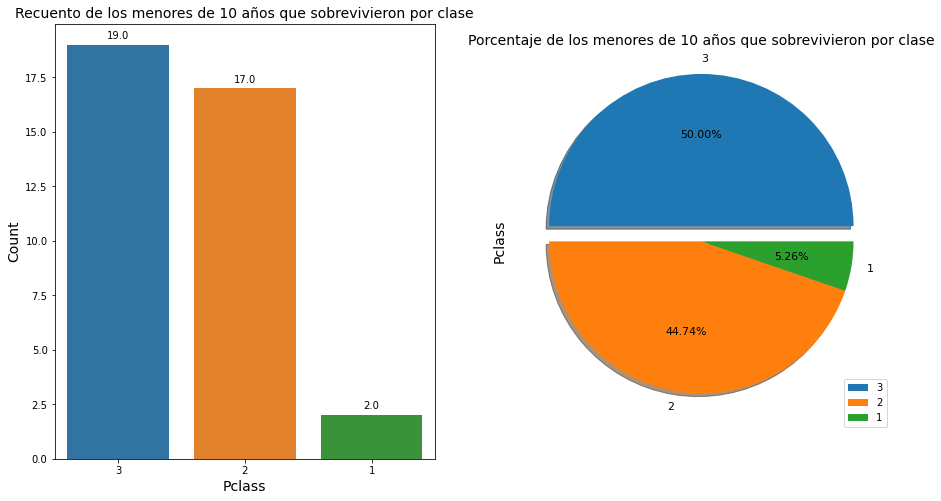

In [ ]:
# Grafica de barras y pie de los menores de 10 años que sobrevivieron por clase
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Pclass", y="Count", data=df_ch_sur_clas,
                ax=ax[0], order=[3, 2, 1])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

ch_sur_clas['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                       ax=ax[1], legend=True, fontsize=11,
                                       explode=[0.1,0,0])

ax[0].set_xlabel('Pclass', size=14)
ax[1].set_ylabel('Pclass', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento de los menores de 10 años que sobrevivieron por clase", size=14)
ax[1].set_title("Porcentaje de los menores de 10 años que sobrevivieron por clase", size=14)

### Cantidad de Pasajeros con edad mayor a 50 años 

In [ ]:
titanic.query('Age >= 50.00').count()

PassengerId    74
Survived       74
Pclass         74
Name           74
Sex            74
Age            74
SibSp          74
Parch          74
Ticket         74
Fare           74
Cabin          37
Embarked       73
dtype: int64

### Sobrevivientes mayores de 50 años 

In [ ]:
titanic.query("Age >= 50.00 and Survived == 1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


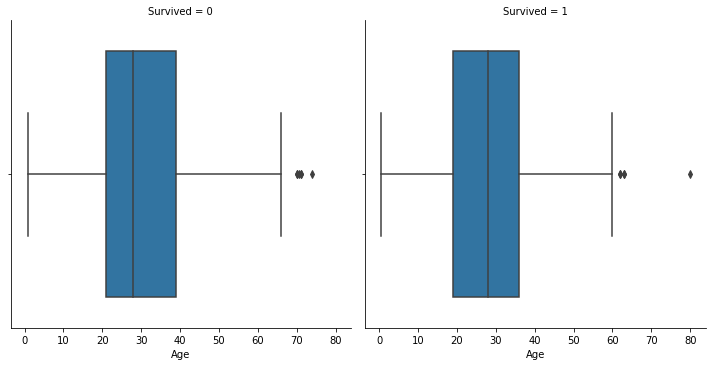

In [ ]:
sns.factorplot(x='Age', data=titanic, col='Survived', kind='box')

En la gráfica derecha nos encontramos con un valor atípico, es una persona de 80 años que sobrevivio. 

Su nombres es **Barkworth, Mr. Algernon Henry Wilson**, el pasajero 630, un hombre que pago un tiquete de primera clase y embarco en Southampton.

In [ ]:
# Total adulto mayor sobreviviente

titanic.query("Age >= 50.00 and Survived == 1").count()

PassengerId    27
Survived       27
Pclass         27
Name           27
Sex            27
Age            27
SibSp          27
Parch          27
Ticket         27
Fare           27
Cabin          18
Embarked       26
dtype: int64

Del filtro anterior a simple vista se visualizó que varias personas con edad superior a los 50 años con tiquete de primera clase sobrevivieron. ¡Veamos cuántos!

In [ ]:
age_old = titanic.query('Age >=50')
age_old_pclas1_sur = age_old.query("Pclass == 1 and Survived == 1")
age_old_pclas1_sur.count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            20
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          18
Embarked       19
dtype: int64

De las 27 personas con edades superiores a los 50 años que sobrevivierón, 20 de ellas eran de primera clase. pero hubo una persona que escapo a esa excepción:

la **pasajera 484**, una mujer de 63 años de tercera clase, su nombre **Turkula, Mrs. (Hedwig)**. sus hijos John y Felix le habían enviado a su madre un boleto a través de una de las agencias de barcos de vapor locales para que viajará a Minnesota para reencontrarsen. Pero por malentendidos o por la huella de carbón que se llevaba a cabo en esos dias, la señora termino en el viaje inaugural del titanic.

In [ ]:
#Dataframe los mayores de 50 años que sobrevivieron por clase
old_sur_clas = titanic.query("Age >= 50.00 and Survived == 1")

#Cantidad de menores que sobrevivieron
total_old_sur = len(old_sur_clas)

df_old_sur_clas = old_sur_clas.groupby('Pclass')[['Pclass']].count()
df_old_sur_clas = df_old_sur_clas.rename(columns={'Pclass':'Count'})

df_old_sur_clas['Percentage'] = round((df_old_sur_clas['Count'] / total_old_sur) * 100, 2)
df_old_sur_clas = df_old_sur_clas.reset_index()

df_old_sur_clas

,Pclass,Count,Percentage
0,1,20,74.07
1,2,6,22.22
2,3,1,3.70


Text(0.5, 1.0, 'Porcentaje de los mayores de 50 años que sobrevivieron por clase')

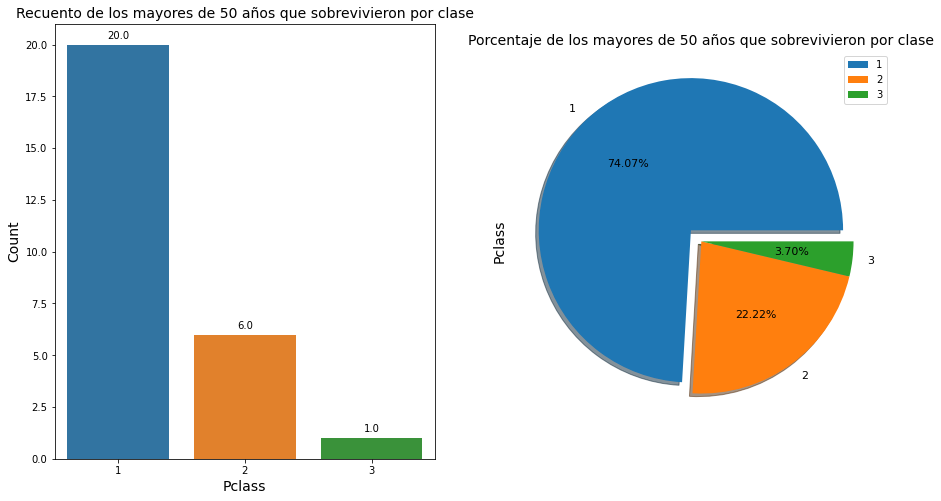

In [ ]:
# Grafica de barras y pie de los mayores de 50 años que sobrevivieron por clase
fig, ax = plt.subplots(1,2, figsize=(15,8))

g = sns.barplot(x="Pclass", y="Count", data=df_old_sur_clas,
                ax=ax[0])
#Anotaciones en la grafica de barras
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,9),
               textcoords='offset points')

old_sur_clas['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                       ax=ax[1], legend=True, fontsize=11,
                                       explode=[0.1,0,0])

ax[0].set_xlabel('Pclass', size=14)
ax[1].set_ylabel('Pclass', size=14)
ax[0].set_ylabel('Count', size=14)
ax[0].set_title("Recuento de los mayores de 50 años que sobrevivieron por clase", size=14)
ax[1].set_title("Porcentaje de los mayores de 50 años que sobrevivieron por clase", size=14)